# Metrics Study

This notebook will focus on studying the results obtained from the tests done with both QA and QAOA.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

---
# QA

## RF distance

In [4]:
# Load the data

rf = pd.read_csv('RF-distance.csv')

rf.head()

,size,id,RF
0,20,10618,41.18
1,20,41388,41.18
2,21,45255,44.44
3,21,48947,27.78
4,22,10240,26.32


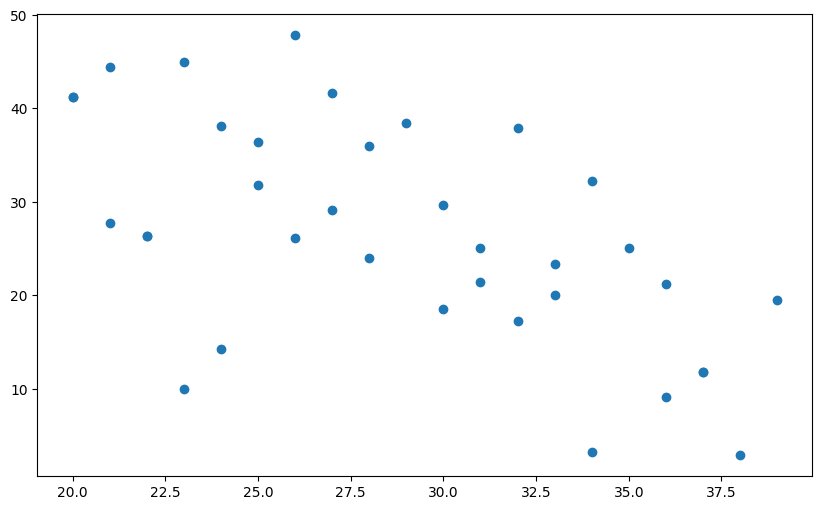

In [5]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(rf['size'], rf['RF'], 'o')

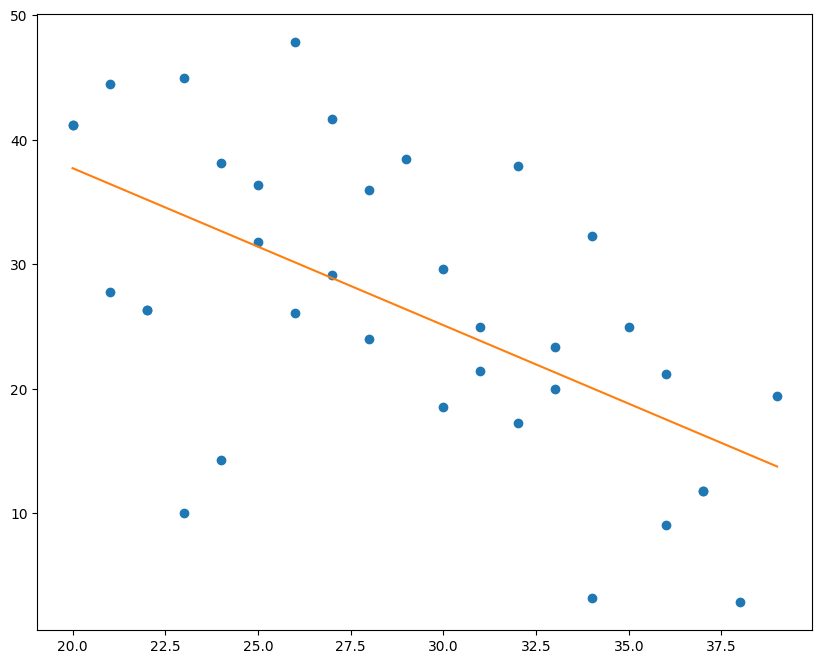

In [6]:
# Create a linear regression model and plot it with the cloud of points

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(rf[['size']], rf['RF'])

fig,ax = plt.subplots(figsize=(10,8))

ax.plot(rf['size'], rf['RF'], 'o')

y_pred = model.predict(rf[['size']])

ax.plot(rf['size'], y_pred)

plt.show()

Then we can try to explain the outliers by using different tree parameters like average branch length or length of sequence. But first, let's identify outliers.

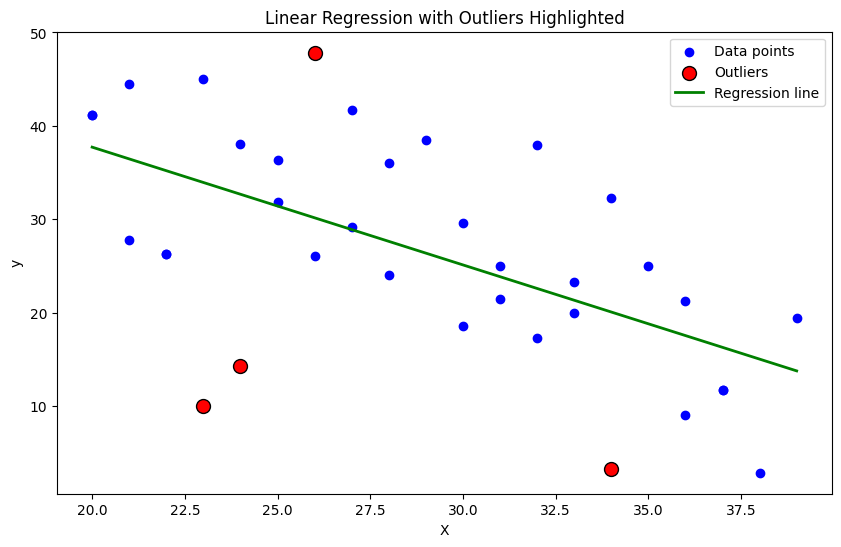

In [7]:
residuals = rf['RF'] - y_pred

# Identify outliers (using z-scores)
threshold = 1.75  # Customize the z-score threshold
outlier_mask = np.abs(zscore(residuals)) > threshold

# Plot the data points and outliers
plt.figure(figsize=(10, 6))
plt.scatter(rf['size'], rf['RF'], label='Data points', color='blue')
plt.scatter(rf['size'][outlier_mask], rf['RF'][outlier_mask], label='Outliers', color='red', edgecolor='k', s=100)
plt.plot(rf['size'], y_pred, label='Regression line', color='green', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression with Outliers Highlighted')
plt.show()

In [8]:
# Median of all rf
median_rf = rf['RF'].median()
print(f'Median of all RF: {median_rf}')

# Mean of all rf
mean_rf = rf['RF'].mean()
print(f'Mean of all RF: {mean_rf}')

Median of all RF: 26.205
Mean of all RF: 26.547222222222224


## Time

In [9]:
time = pd.read_csv('timer.csv')
time.head()

,size,name,time
0,20,assembled_sequences_10618.fasta,894.84616
1,20,assembled_sequences_41388.fasta,845.65204
2,21,assembled_sequences_45255.fasta,876.65884
3,21,assembled_sequences_48947.fasta,804.53424
4,22,assembled_sequences_10240.fasta,1292.21272


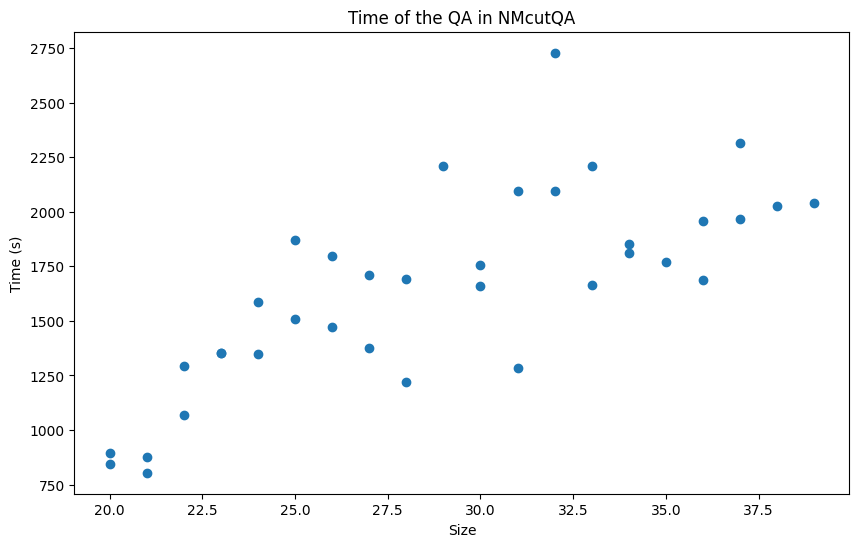

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(time['size'], time['time'], 'o')
plt.xlabel('Size')
plt.ylabel('Time (s)')
plt.title('Time of the QA in NMcutQA')
plt.show()

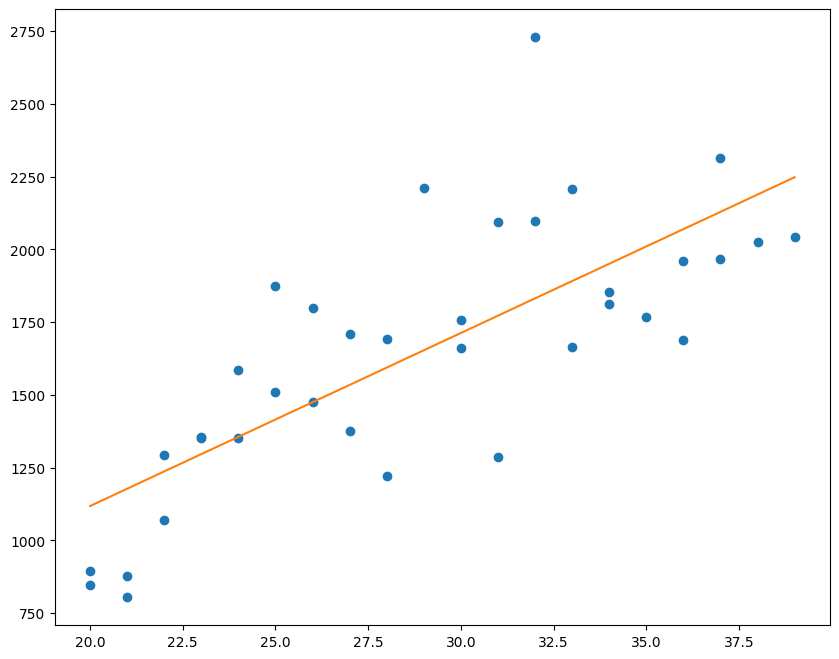

In [11]:
# Seems linear so, linear regression it is

model = LinearRegression()

model.fit(time[['size']], time['time'])

fig,ax = plt.subplots(figsize=(10,8))

X = time['size']
y = time['time']

ax.plot(X, y, 'o')

y_pred = model.predict(rf[['size']])

ax.plot(X, y_pred)

plt.show()

Text(0.5, 1.0, 'Approximate number of subproblems in NMcutQA')

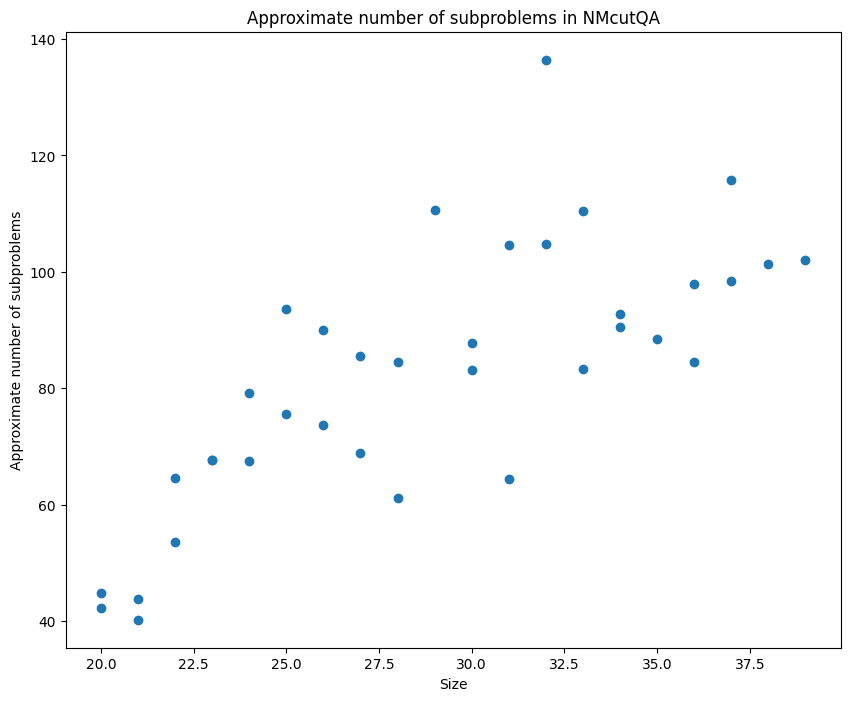

In [12]:
transform_time = time['time']/20

plt.subplots(figsize=(10,8))

plt.plot(time['size'], transform_time, 'o')
plt.xlabel('Size')
plt.ylabel('Approximate number of subproblems')

plt.title('Approximate number of subproblems in NMcutQA')

---
# QAOA

The QAOA, as espected, performed a lot worse than the QA, both in time and RF, let's see the few executions it made

## Time

In [14]:
qaoa_time = pd.read_csv('timer_qaoa.csv')
qaoa_time.head()

,size,name,time
0,20,matrix_10618.npy,1.885833e+07
1,20,matrix_41388.npy,1.871889e+07
2,21,matrix_45255.npy,2.240694e+07
3,21,matrix_48947.npy,2.013079e+07


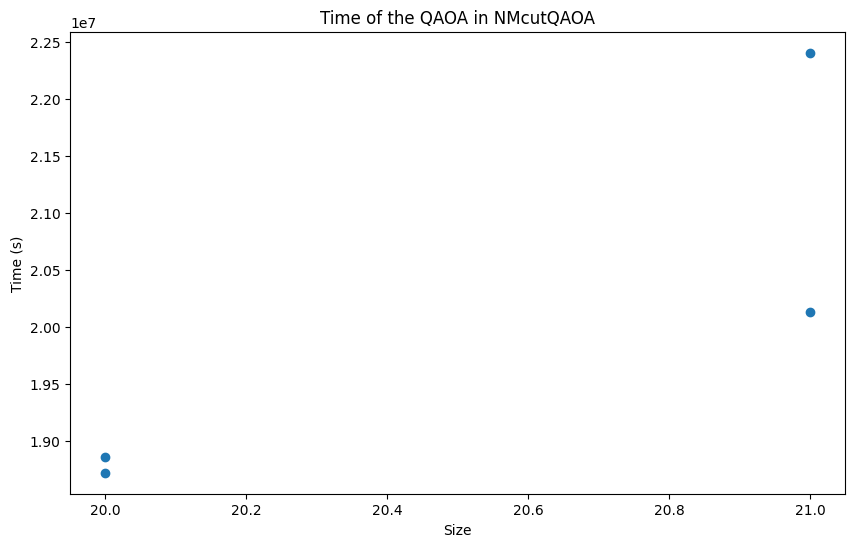

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(qaoa_time['size'], qaoa_time['time'], 'o')
plt.xlabel('Size')
plt.ylabel('Time (s)')
plt.title('Time of the QAOA in NMcutQAOA')
plt.show()

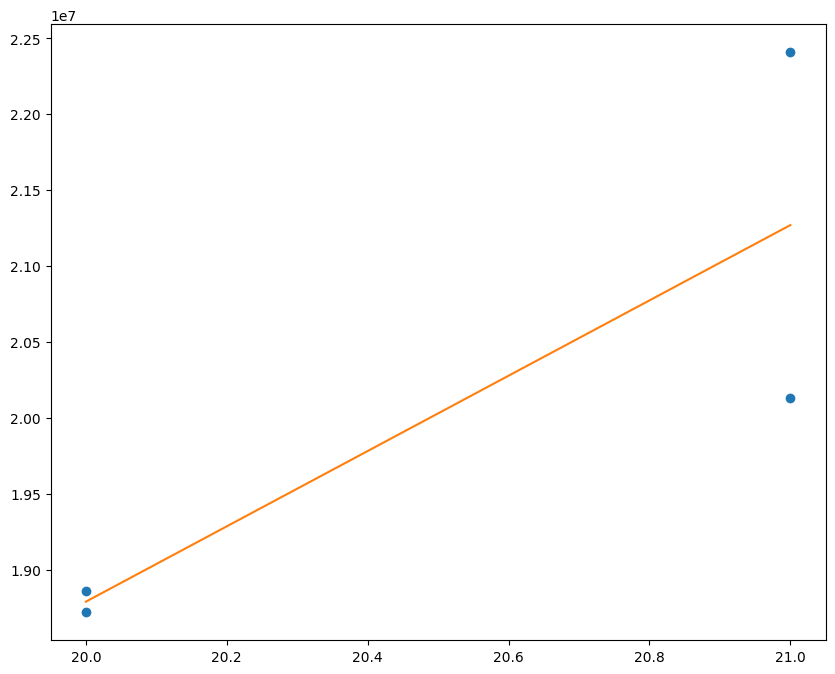

In [18]:
# Seems linear so, linear regression it is

model = LinearRegression()

model.fit(qaoa_time[['size']], qaoa_time['time'])

fig,ax = plt.subplots(figsize=(10,8))

X = qaoa_time['size']
y = qaoa_time['time']

ax.plot(X, y, 'o')

y_pred = model.predict(qaoa_time[['size']])

ax.plot(X, y_pred)

plt.show()

It's stupid to do statistics when having 2 or 3 values, so we can try to use smaller trees. Also:

## RF

In [20]:
rf_qaoa = pd.read_csv('RF-distance_qaoa.csv')
rf_qaoa.head()

,size,id,RF
0,20,10618,5.88
1,20,41388,0.00
2,21,45255,11.11
3,21,48947,5.56


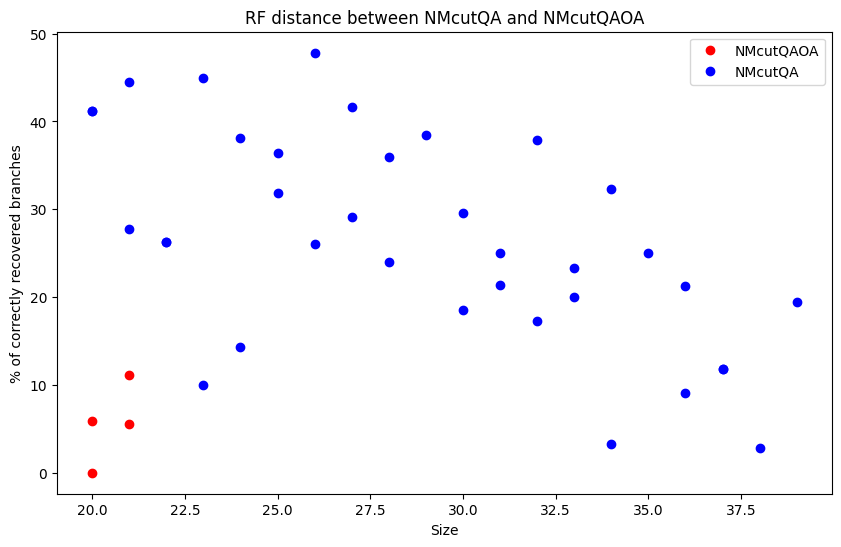

In [29]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(rf_qaoa['size'], rf_qaoa['RF'], 'o',color='red',label='NMcutQAOA')
plt.plot(rf['size'], rf['RF'], 'o',color='blue',label='NMcutQA')
plt.legend()
plt.xlabel('Size')
plt.ylabel('% of correctly recovered branches') 
plt.title('RF distance between NMcutQA and NMcutQAOA')
plt.show()